=== Handle imports and paths ===

In [2]:
import sys
sys.path.append('/mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/functions/') 
from paths_and_imports import *
from control_flow_functions import *
%load_ext autoreload
%autoreload 2

=== Load the trained model ===

In [2]:
trained_model = get_gnn(fs=feature_scale, dropout_levels=dropout_levels, 
                           pooling_path=pooling_path, ico_levels=ico_levels)    
trained_model.load_state_dict(torch.load(f'{output_dir}trained_weights.pth'))

<All keys matched successfully>

=== Validate the model on the CN and AD testing sets ===

Cognitively Normal (CN) Subjects


    === Model/Training Params ===

    batch_size = 8
    batch_load = 8
    n_epochs = 50
    lr = 0.01
    L2 regularization = 0
    intra_w = 0.5
    global_w = 1
    feature_scale = 1
    dropout_levels = [0, 0, 0.5, 0.5, 0]
    
MAE (L1) Loss: 7.682 across 1128 observations
Variance and MAE Loss: 108.611 across 1128 observations


Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_CN_raw_age_gaps.png
Figure stats: mean = -1.7227107301117173 ; median = -1.5042725107699866 ; std = 6.203043648208301 ; var = 38.477750501577354
Factors: [-0.80490481 59.21785945]
Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_CN_corrected_age_gaps.png
Figure stats: mean = -9.69513471534789e-07 ; median = -0.4046447722727393 ; std = 2.9805725895188977 ; var = 8.883812961391389

Top 10 significant age gaps:

               region hemi       age_gap variance  skew  region_avg     adj_pval
       G_temporal_inf   rh -6.58 (-8.3

<Figure size 640x480 with 0 Axes>

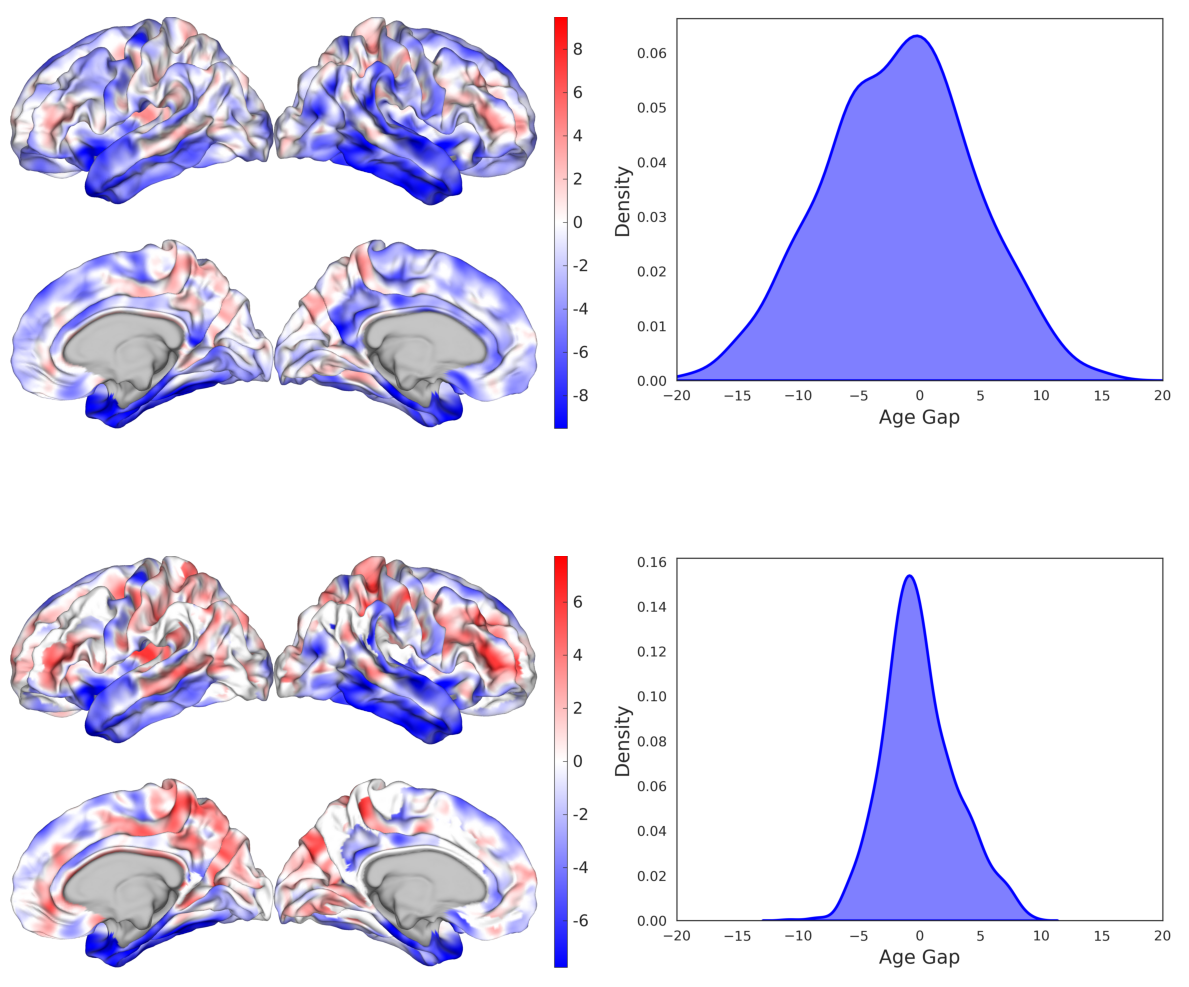

In [3]:
suffix='test_CN'
test_model(X_test_CN, y_test_CN, model=trained_model, suffix=suffix)
postprocess_model(suffix, factors=None, global_limits=20)

Alzheimer's Disease (AD) Subjects


    === Model/Training Params ===

    batch_size = 8
    batch_load = 8
    n_epochs = 50
    lr = 0.01
    L2 regularization = 0
    intra_w = 0.5
    global_w = 1
    feature_scale = 1
    dropout_levels = [0, 0, 0.5, 0.5, 0]
    
MAE (L1) Loss: 8.682 across 477 observations
Variance and MAE Loss: 136.340 across 477 observations


Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_AD_raw_age_gaps.png
Figure stats: mean = 0.5549297699215127 ; median = -0.21750593907790972 ; std = 8.158867920108715 ; var = 66.56712573777911
Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_AD_corrected_age_gaps.png
Figure stats: mean = 2.6083808921494582 ; median = 2.4169310861741877 ; std = 3.3617050806931044 ; var = 11.301061049557832

Top 10 significant age gaps:

                   region hemi     age_gap variance  skew  region_avg     adj_pval
    S_temporal_transverse   lh 6.09 (4.04)    65.29 -0.28        3.95 5.90915

<Figure size 640x480 with 0 Axes>

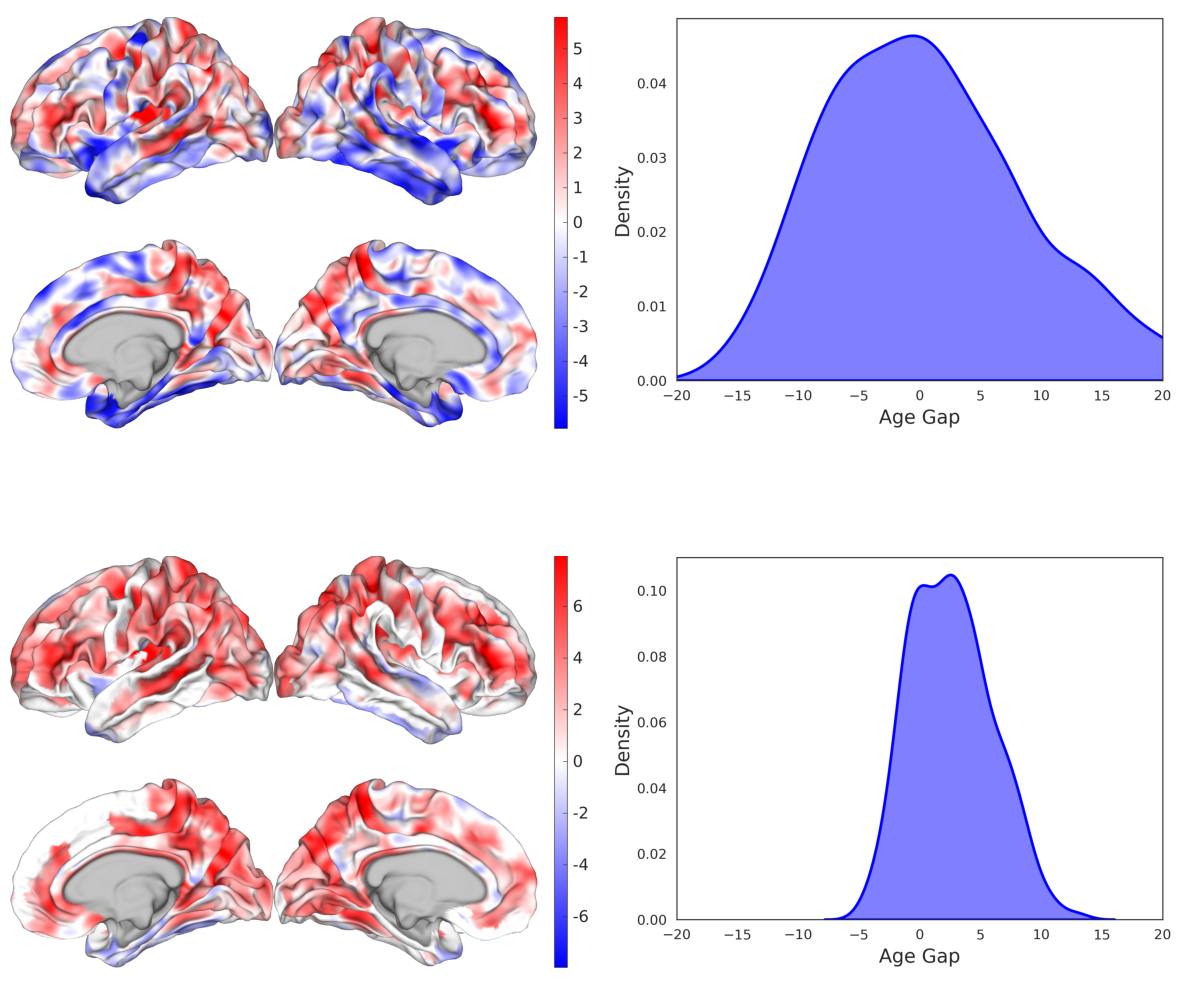

In [4]:
suffix='test_AD'
test_model(X_test_AD, y_test_AD, model=trained_model, suffix=suffix)
postprocess_model(suffix, factors=np.load(f'{output_dir}test_CN_factors.npy'))

View differences in predictions and error across CNs and ADs


Top 10 significant age gaps:

               region hemi  age_gap    t_stat      raw_pval  region_avg      adj_pval  significant
       G_temporal_inf   rh 4.876206 70.899914  0.000000e+00    4.358764  0.000000e+00            1
        Pole_temporal   rh 4.841751 71.215449  0.000000e+00    4.676055  0.000000e+00            1
G_temp_sup-Plan_polar   rh 4.513749 18.602201  2.764841e-57    4.230655  4.147261e-57            1
        Pole_temporal   lh 4.510358 35.968426 2.317014e-171    4.676055 1.579782e-170            1
       S_temporal_inf   rh 4.503734 33.536596 6.330287e-142    4.084189 2.792774e-141            1
G_temp_sup-G_T_transv   rh 4.440349 31.123366  8.085902e-97    3.713255  1.925215e-96            1
        S_oc-temp_lat   rh 4.382002 43.638303 2.646252e-173    3.702710 1.984689e-172            1
G_oc-temp_med-Parahip   lh 4.361466 36.369945 2.678086e-193    4.293688 2.510706e-192            1
    G_temporal_middle   rh 4.311656 43.321542 1.384448e-267    4.104474 2.0766

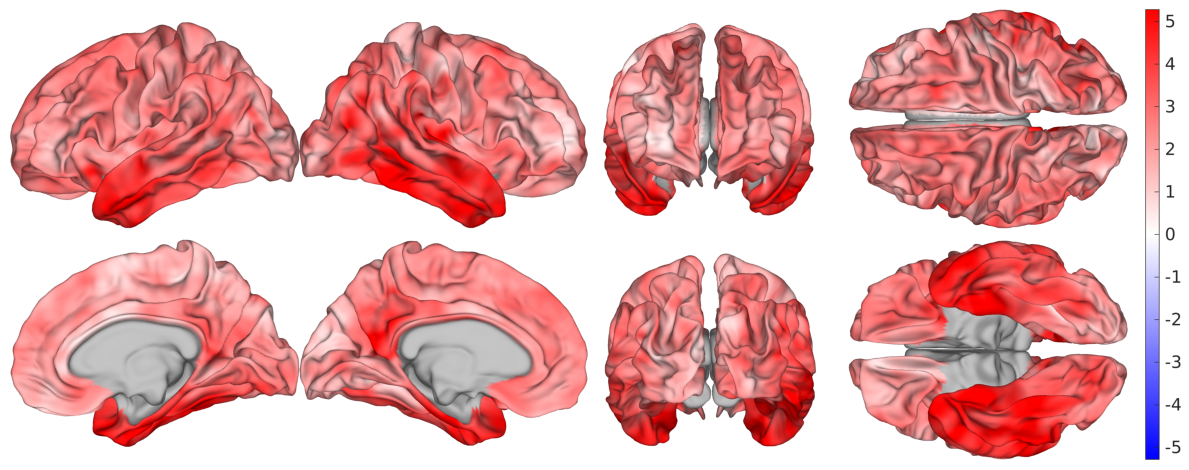

In [5]:
compare_cohorts(suffix='AD-CN', cohort_pred='test_AD', cohort_ref='test_CN') # pred - ref

Display the age gaps of the CN and AD sets

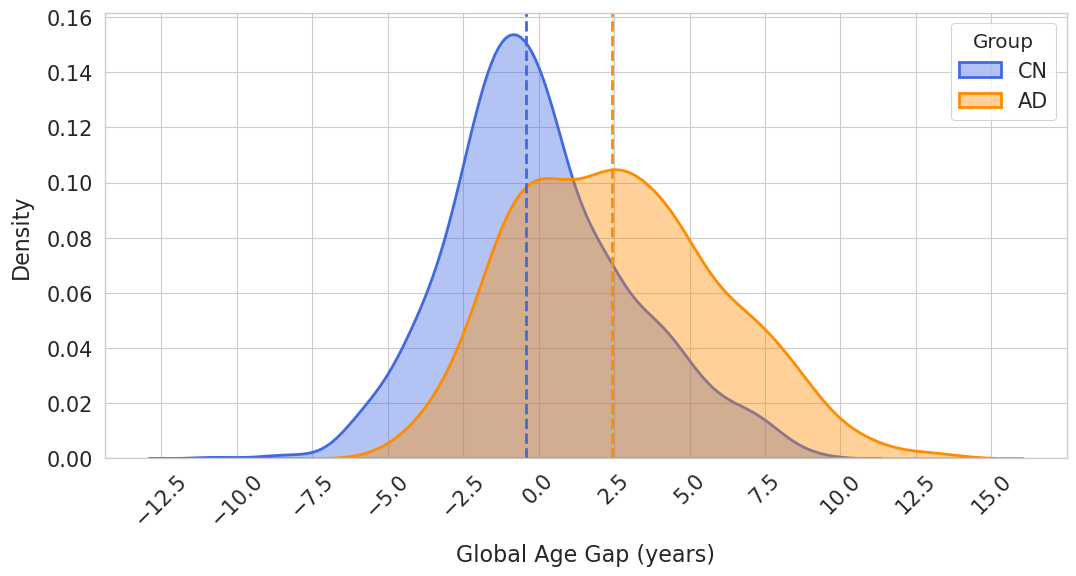

In [17]:
# Load the data
CN_AGs = np.load(f'{output_dir}test_CN_corrected_age_gaps.npy')
AD_AGs = np.load(f'{output_dir}test_AD_corrected_age_gaps.npy')

# Set seaborn style
sns.set_style('whitegrid')

# Create KDE plot
plt.figure(figsize=(11, 6))
sns.kdeplot(CN_AGs, color='royalblue', label='CN', fill=True, alpha=0.4, linewidth=2)
sns.kdeplot(AD_AGs, color='darkorange', label='AD', fill=True, alpha=0.4, linewidth=2)

# Add vertical lines at the medians
plt.axvline(np.median(CN_AGs), color='royalblue', linestyle='--', linewidth=2)
plt.axvline(np.median(AD_AGs), color='darkorange', linestyle='--', linewidth=2)

# Set x-axis ticks centered at 0 with a step of 2.5, rotated 45 degrees
xtick_min = np.floor(min(np.min(CN_AGs), np.min(AD_AGs)) / 2.5) * 2.5
xtick_max = np.ceil(max(np.max(CN_AGs), np.max(AD_AGs)) / 2.5) * 2.5
plt.xticks(np.arange(xtick_min, xtick_max + 0.1, 2.5), rotation=45, fontsize=15)
plt.yticks(fontsize=15)

# Customize plot
plt.xlabel('Global Age Gap (years)', size=16, labelpad=10)
plt.ylabel('Density', size=16, labelpad=10)
plt.legend(title='Group', fontsize=15)
plt.tight_layout()
plt.savefig(f'{output_dir}ADNI_AGs.png')

Get the region stats, including average age gap, for CNs, ADs, and AD-CNs

In [6]:
print('\n\nCN\n')
show_ranked_differences(suffix='test_CN', output_dir=output_dir)
print('\n\nAD\n')
show_ranked_differences(suffix='test_AD', output_dir=output_dir)
print('\n\nAD-CN\n')
show_ranked_differences(suffix='AD-CN', output_dir=output_dir)



CN


All regions ranked by average age gap:
Region                               Avg Gap   LH Gap   RH Gap
-------------------------------------------------------------------------------------
S_postcentral                           3.17     2.82     3.51 
S_intrapariet_and_P_trans               3.04     3.29     2.78 
S_circular_insula_sup                   2.73     3.28     2.18 
S_front_inf                             2.72     2.07     3.38 
S_orbital_lateral                       2.72     2.88     2.56 
S_cingul-Marginalis                     2.46     1.91     3.01 
S_central                               2.38     2.81     1.94 
S_front_middle                          2.35     1.36     3.34 
Lat_Fis-ant-Horizont                    2.31     2.48     2.15 
S_parieto_occipital                     1.89     1.40     2.38 
S_oc_sup_and_transversal                1.73     1.59     1.88 
Lat_Fis-ant-Vertical                    1.64     2.17     1.10 
S_front_sup                          

=== Determine relationship between brain age gap and cognitive scores ===

Regress global brain age gap and cognitive scores

In [7]:
# Associate regions with colloquial names
regions = {'all' : 'BA'}
global_results = regress_cognitive(data_dir, output_dir, regions=regions, subset=True, postprocess_obj=postprocess())
global_results.to_csv(f'{output_dir}global_cog_tests.csv')

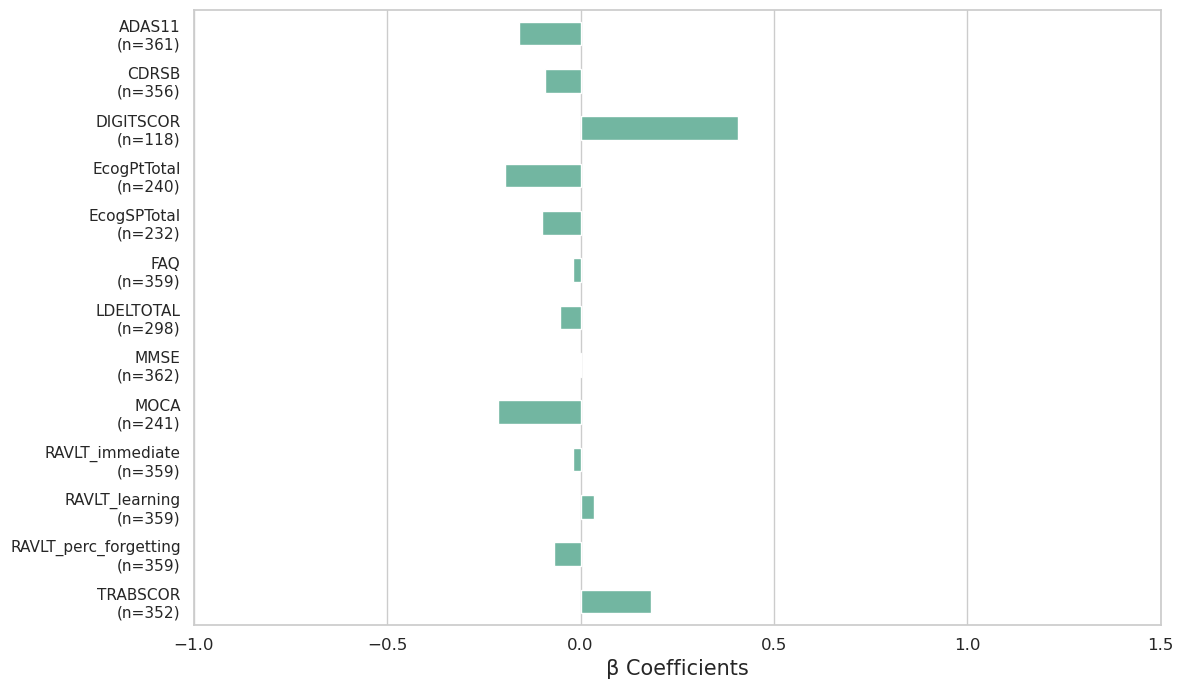

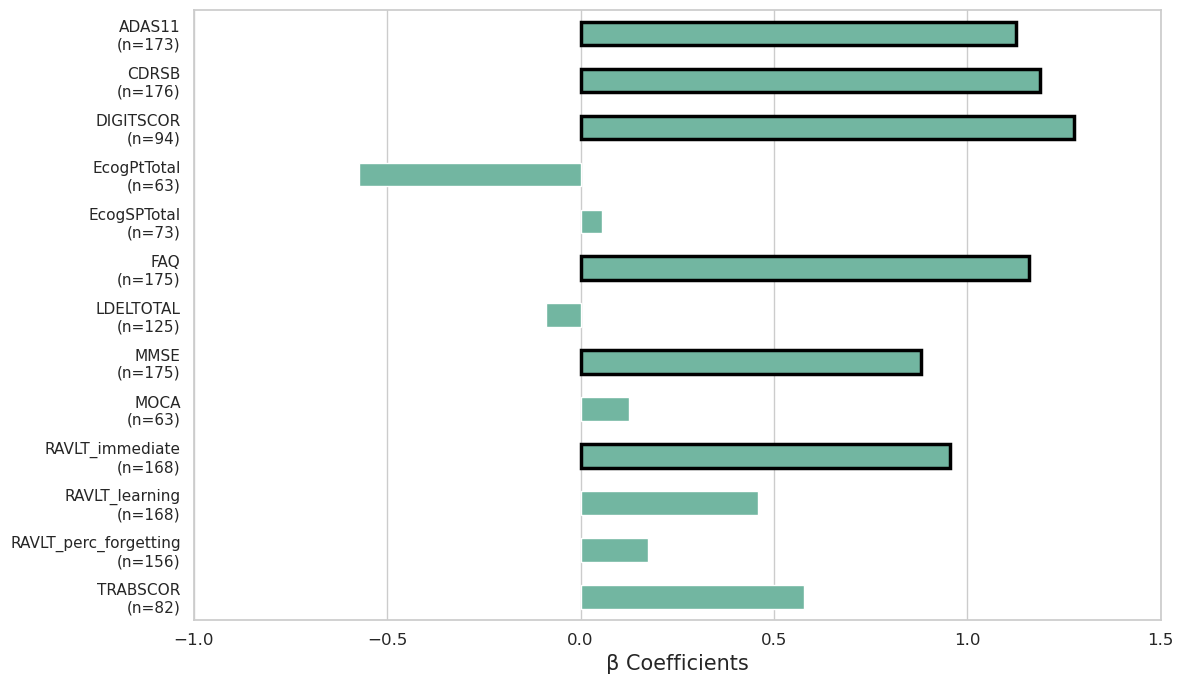

In [8]:
global_results = pd.read_csv(f'{output_dir}global_cog_tests.csv')

# Set style
sns.set(style='whitegrid')
hue_order = ['BA', 'CA']

# Filter by cohort and test name
df_cn = global_results[(global_results['cohort'] == 'CN')]
df_ad = global_results[(global_results['cohort'] == 'AD')]

# Define cohorts and labels
cohort_dfs = [(df_cn, 'CN'), (df_ad, 'AD')]

# Loop through each cohort and make individual plots
for df, label in cohort_dfs:
    fig, ax = plt.subplots(figsize=(12, 7))

    sns.barplot(
        data=df,
        y='test_n_subjects',
        x='coef',
        hue='region',
        palette='Set2',
        ax=ax,
        width=0.5
    )

    ax.set_ylabel('')
    ax.set_xlim([-1, 1.5])
    ax.tick_params(axis='x', labelsize=12)
    try: ax.get_legend().remove()
    except: pass

    # Bold significant bars
    bold_significant_bars(df, ax, hue_order)

    # Save individual figure
    plt.tight_layout()
    plt.savefig(f'{output_dir}global_cog_barplot_{label}.png')

    ax.set_xlabel('')
    ax.set_xlabel('β Coefficients', fontsize=15)

# Removed subplot indicators (A, B)
plt.tight_layout()

Run regressions between the regions and the cognitive scores, for each region/cognitive score combination

In [9]:
# Get the regression results
local_results = regress_cognitive(data_dir, output_dir, subset=False, postprocess_obj=postprocess())

# Create an additional "display_values" column for plotting purposes
local_results['display_values'] = np.where(local_results['adj_pval'] >= 0.05, 0, # if insig, = 0
                                         local_results['coef']) # else, = coef

# Save the df
local_results.to_csv(f'{output_dir}local_cog_tests.csv')

Create arrays of the significant β coefficients for each cognitive test

In [10]:
# Load in the csv
local_results = pd.read_csv(f'{output_dir}local_cog_tests.csv')

# Create a dict to hold all cognitive test arrays
all_cog_arrays = {}

# Get the names and labels
labels, names, _ = postprocess().get_labels()

# Map region names (lowercase) -> label index, for both hemispheres combined
region_to_label_indices = {name.lower(): i for i, (name, hemi) in enumerate(names)}

# Get a list of all cognitive tests
tests = local_results['test'].unique()

# Iterate through the test results
for cohort in ['CN', 'AD']:

    # Select the results for a given cohort
    cohort_results = local_results[local_results['cohort'] == cohort]

    # Iterate through the tests
    for test_name in tests:

        # Select results for a given test
        test_results = cohort_results[cohort_results['test'] == test_name] # select results for a given test
        if (test_results['display_values'] == 0).all(): continue # if all values = 0, skip this cognitive test
        region_values = dict(zip(test_results['region'].str.lower(), test_results['display_values'])) # get the values for each region

        # Create an array of shape (n_vertices,) to display the values
        display_array = np.zeros_like(labels, dtype=np.float64)

        # Iterate over the region-hemisphere combinations, and re-populate vertices based on the label mean
        for (region_name, hemi), label_index in zip(names, np.unique(labels)):
            if region_name.lower() in region_values:
                value = region_values[region_name.lower()]
                display_array[labels == label_index] = value

        # If the array is not just 0s
        if not np.all(display_array == 0): 
            all_cog_arrays[f'{test_name}_{cohort}'] = display_array

In [11]:
# === Load data === #
local_results = pd.read_csv(f'{output_dir}local_cog_tests.csv')
global_results = pd.read_csv(f'{output_dir}global_cog_tests.csv')  # Assumes this exists

# === Filter for globally significant tests === #
significant_tests = global_results.loc[global_results['adj_pval'] < 0.05, 'test'].unique()

# Create a dict to hold all cognitive test arrays
all_cog_arrays = {}

# Get the names and labels
labels, names, _ = postprocess().get_labels()

# Map region names (lowercase) -> label index
region_to_label_indices = {name.lower(): i for i, (name, hemi) in enumerate(names)}

# === Build region arrays ===
for cohort in ['CN', 'AD']:
    cohort_results = local_results[local_results['cohort'] == cohort]

    for test_name in significant_tests:
        test_results = cohort_results[cohort_results['test'] == test_name]
        if (test_results['display_values'] == 0).all():
            continue  # skip empty tests

        # Map region name -> display_value
        region_values = dict(zip(test_results['region'].str.lower(), test_results['display_values']))
        display_array = np.zeros_like(labels, dtype=np.float64)

        # Fill display array using regional values
        for (region_name, hemi), label_index in zip(names, np.unique(labels)):
            if region_name.lower() in region_values:
                value = region_values[region_name.lower()]
                display_array[labels == label_index] = value

        # Keep only maps with at least one significant region
        if np.any(display_array != 0):

            # Get absolute nonzero values
            abs_vals = np.abs(display_array[display_array != 0])

            # Compute 75th percentile threshold (top 25%)
            threshold = np.percentile(abs_vals, 75)

            # Mask values below threshold
            display_array[np.abs(display_array) < threshold] = 0

            key = f'{test_name}_{cohort}'
            all_cog_arrays[key] = display_array

# === Find most dissimilar pair === #
keys = list(all_cog_arrays.keys())
if len(keys) < 2:
    raise ValueError("Not enough qualifying maps (globally significant + locally nonzero) to compare.")

X = np.array([all_cog_arrays[k] for k in keys])  # shape: (n_maps, n_vertices)

# Remove uninformative vertices (all zero across maps)
nonzero_mask = np.any(X != 0, axis=0)
X = X[:, nonzero_mask]

# Compute correlation distance: D[i, j] = 1 - corr(X[i], X[j])
D = squareform(pdist(X, metric='correlation'))
np.fill_diagonal(D, -1)  # exclude self-comparisons

# Find the most dissimilar pair
i, j = np.unravel_index(np.argmax(D), D.shape)
most_different_keys = [keys[i], keys[j]]
distance = D[i, j]
correlation = 1 - distance

# Keep only the two selected maps
all_cog_arrays = {k: all_cog_arrays[k] for k in most_different_keys}

# === Output === #
print(f"Selected most dissimilar maps (globally significant only):")
print(f"  {most_different_keys[0]} vs {most_different_keys[1]}")
print(f"  Correlation distance = {distance:.3f} → Pearson r = {correlation:.3f}")

Selected most dissimilar maps (globally significant only):
  ADAS11_AD vs DIGITSCOR_AD
  Correlation distance = 1.190 → Pearson r = -0.190


Plot this on the cortex

In [12]:
clim_val = "1" # Set the clim to [-1, 1] 

# Get the MATLAB arrays and pngs for all tests
for test in list(all_cog_arrays.keys()):

    # Get the beta coefficients as MATLAB arrays
    postprocess().get_matlab(all_cog_arrays[test], output_path=f'{output_dir}cog_test_values/{test}_beta_coefs')

    # Convert to MATLAB cell array syntax
    mat_files = [f'{output_dir}cog_test_values/{test}_beta_coefs.mat']
    matlab_file_list = "{" + ",".join([f"'{f}'" for f in mat_files]) + "}"

    # Full MATLAB command
    matlab_command = (
        f"generate_brain({matlab_file_list}, "
        f"{{'lat_L','lat_R','med_R','med_L'}}, {clim_val}, true); exit"
    )

    # Run the MATLAB code
    command = ["matlab", "-nodisplay", "-nosplash", "-r", matlab_command]
    result = subprocess.run(
        command,
        cwd="/mnt/md0/tempFolder/samAnderson/nahian_code/",
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        text=True
    )
    #print(result)
    
# Save the arrays
with open(f'{output_dir}cog_test_values/all_cog_arrays.pkl', 'wb') as f:
    pickle.dump(all_cog_arrays, f)

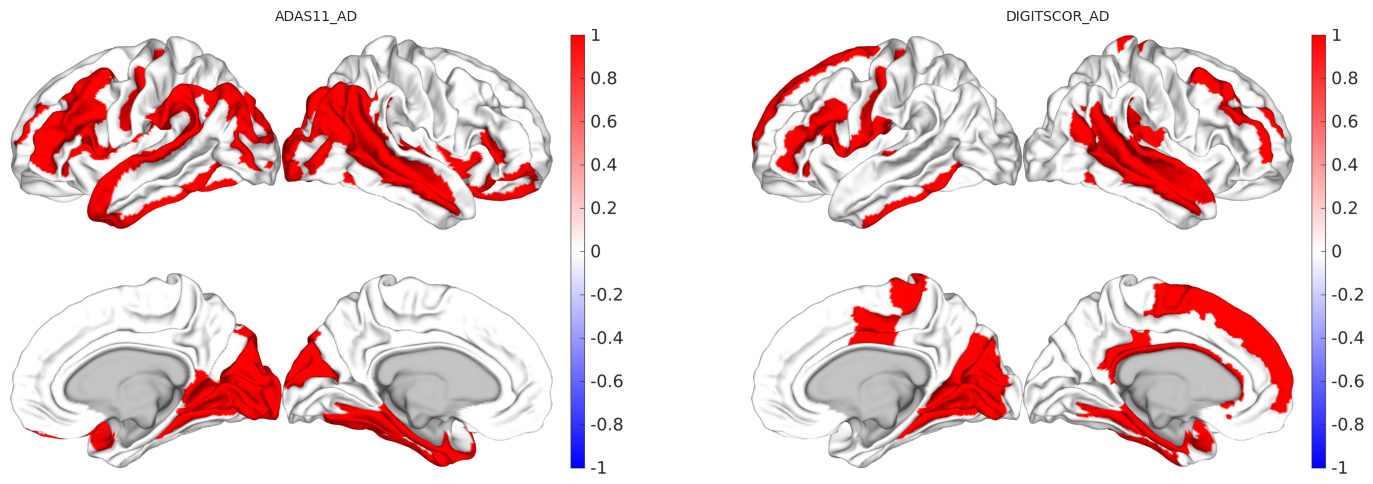

In [13]:
# Load the cognitive arrays (significant t-statistics)
with open(f'{output_dir}cog_test_values/all_cog_arrays.pkl', 'rb') as f:
    all_cog_arrays = pickle.load(f)
    
# Load the global csv
global_results = pd.read_csv(f'{output_dir}global_cog_tests.csv')

# Prepare plot paths
plot_paths = []
test_titles = []

# Loop over the tests to derive file names
for test in all_cog_arrays.keys():
    
    # Select the appropriate column
    mask = (
    (global_results['cohort'] == test[-2:]) &
    (global_results['test_n_subjects'].str[:len(test)-3] == test[:-3]))
            
    # Filter for globally significant results
    if (global_results.loc[mask, 'adj_pval'] < 0.05).any():
        test_titles.append(test)  # Keep full name including _CN or _AD
        plot_paths.append(f'{output_dir}cog_test_values/{test}_beta_coefs_latL_latR_medR_medL.png')

# Set subplot layout
n_cols = 2
n_rows = 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot each image with its corresponding title
for i, (img_path, title) in enumerate(zip(plot_paths, test_titles)):
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(title, fontsize=10)

# Hide any unused axes
for j in range(len(plot_paths), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()